In [33]:
import numpy as np
import matplotlib.pyplot as plt
from aki_richard import zoeppritz

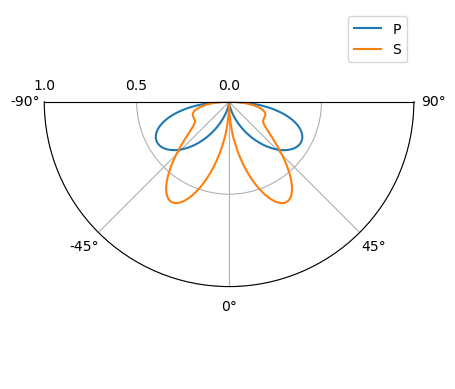

In [75]:
r1 = 1.0
a1 = 1.5
b1 = 0.1
r2 = 2.0
a2 = 2.0
b2 = 0.2


fig = plt.figure()
ax = fig.add_subplot(projection="polar")

theta = np.linspace(-np.pi / 2, np.pi / 2, 202)
p = np.sin(theta) / a2
out = np.zeros(p.shape, dtype="complex")
for idx, value in enumerate(p):
    I, S = zoeppritz(r1, a1, b1, r2, a2, b2, value)
    gain_P = np.sin(I[2]) * (1 + S[2, 2]) + np.cos(I[3]) * S[3, 2]
    _gain_P = np.sin(I[0]) * S[0, 2] + np.cos(I[1]) * S[1, 2]
    assert np.isclose(gain_P, _gain_P)
    out[idx] = gain_P
ax.plot(theta, np.abs(p * out) * a2, label="P")

theta = np.linspace(-np.pi / 2, np.pi / 2, 202)
p = np.sin(theta) / b2
out = np.zeros(p.shape, dtype="complex")
for idx, value in enumerate(p):
    I, S = zoeppritz(r1, a1, b1, r2, a2, b2, value)
    gain_S = np.cos(I[3]) * (1 + S[3, 3]) + np.sin(I[2]) * S[2, 3]
    _gain_S = np.sin(I[0]) * S[0, 3] + np.cos(I[1]) * S[1, 3]
    assert np.isclose(gain_S, _gain_S)
    out[idx] = gain_S
ax.plot(theta, np.abs(p * out) * b2, label="S")

ax.legend()
ax.set_xlim(-np.pi / 2, np.pi / 2)
ax.set_xticks([-np.pi / 2, -np.pi / 4, 0, np.pi / 4, np.pi / 2])
ax.set_rlim(0, 1)
ax.set_theta_zero_location("S")
ax.set_rticks([0, 0.5, 1])
